<h1>Popularity Prediction in Spotify Dataset using Ensemble Learning</h1>

<h3>Importing Libraries and Dataset (Data Extraction)</h3>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [120]:
df = pd.read_csv('dataset.csv').sample(frac=0.33)

df.head()

Unnamed: 0                track_id                         artists  \
43265       43265  2rvQ8M4T6rbpc2c63pwNMu                     Lamb of God   
28209       28209  76I3PmbGZazzNlEwlp1y85                          Zomboy   
61188       61188  2TgNvhqnAThN6lOXuAwDwj                     SUPER☆GiRLS   
54844       54844  7CwPfkFGmNB7gFxY9NVx97                        Tineidae   
19022       19022  46lUgixgC1Q39P0oWwJZLF  Thomas Rhett;Danielle Bradbery   

              album_name         track_name  popularity  duration_ms  \
43265          Sacrament         Descending          54       215240   
28209          Lone Wolf          Lone Wolf          54       256500   
61188       Summer Lemon       Summer Lemon          27       236500   
54844         Mothership    Behind the Seal           8       363446   
19022  Sad Country Songs  Playing With Fire           3       206706   

       explicit  danceability  energy  ...  loudness  mode  speechiness  \
43265     False         0.494   0.969  ...    -3.500     1       0.0905   
28209     False         0.502   0.981  ...    -1.573     1       0.0616   
61188     False         0.528   0.945  ...    -3.342     0       0.0542   
54844     False         0.178   0.262  ...   -18.622     1       0.0378   
19022     False         0.477   0.697  ...    -4.348     1       0.0301   

       acousticness  instrumentalness  liveness  valence    tempo  \
43265      0.000079          0.000044    0.0736   0.1290   93.185   
28209      0.001770          0.400000    0.1540   0.2080  150.013   
61188      0.007440          0.000006    0.3460   0.7520  170.055   
54844      0.111000          0.924000    0.0957   0.0269  139.959   
19022      0.031000          0.000000    0.1110   0.4860  150.048   

       time_signature  track_genre  
43265               3       groove  
28209               4          dub  
61188               4       j-idol  
54844               4          idm  
19022               3      country  

[5 rows x 21 columns]

<p>
    Taking 0.33 fraction of whole dataset as the dataset is too big and processing one cell might take hours during model
    fitting, evaluation and cross-validation. Due to this, some metrics like accuracy will be affected but we are just
    exploring the dataset through ensemble learning and cross-validation technique.
</p>

<h3>Exploratory Data Analysis</h3>

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37620 entries, 43265 to 1305
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        37620 non-null  int64  
 1   track_id          37620 non-null  object 
 2   artists           37619 non-null  object 
 3   album_name        37619 non-null  object 
 4   track_name        37619 non-null  object 
 5   popularity        37620 non-null  int64  
 6   duration_ms       37620 non-null  int64  
 7   explicit          37620 non-null  bool   
 8   danceability      37620 non-null  float64
 9   energy            37620 non-null  float64
 10  key               37620 non-null  int64  
 11  loudness          37620 non-null  float64
 12  mode              37620 non-null  int64  
 13  speechiness       37620 non-null  float64
 14  acousticness      37620 non-null  float64
 15  instrumentalness  37620 non-null  float64
 16  liveness          37620 non-null  flo

In [122]:
df.describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count   37620.000000  37620.000000  3.762000e+04  37620.000000  37620.000000   
mean    57075.277166     33.147661  2.291598e+05      0.566144      0.640231   
std     32827.694416     22.277118  1.172367e+05      0.174502      0.252755   
min         0.000000      0.000000  0.000000e+00      0.000000      0.000000   
25%     28603.750000     17.000000  1.740548e+05      0.454000      0.471000   
50%     57175.000000     34.000000  2.130955e+05      0.580000      0.684000   
75%     85232.500000     50.000000  2.620450e+05      0.695000      0.853000   
max    113997.000000     98.000000  5.237295e+06      0.984000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  37620.000000  37620.000000  37620.000000  37620.000000  37620.000000   
mean       5.269750     -8.291781      0.640537      0.084635      0.314907   
std        3.562241      5.095100      0.479849      0.105845      0.333311   
min        0.000000    -49.307000      0.000000      0.000000      0.000000   
25%        2.000000    -10.024000      0.000000      0.036000      0.017100   
50%        5.000000     -7.005500      1.000000      0.048900      0.166000   
75%        8.000000     -5.001750      1.000000      0.084400      0.598000   
max       11.000000      3.156000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      37620.000000  37620.000000  37620.000000  37620.000000   
mean           0.158107      0.214451      0.471852    122.300278   
std            0.311668      0.191213      0.259701     29.927716   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.097975      0.256000     99.782500   
50%            0.000043      0.132000      0.460000    122.038000   
75%            0.052000      0.276000      0.682000    140.056000   
max            1.000000      1.000000      0.995000    220.039000   

       time_signature  
count    37620.000000  
mean         3.903004  
std          0.431583  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [123]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

<p><b><big>Features: </big></b></p> <br />
<div><b></b></div>
<div>
    <b>Explicit: </b>
    <p>The "explicit" attribute in a music dataset indicates whether a song contains explicit content or explicit lyrics. It refer to material that contains explicit language, themes, or content that may be considered offensive, sensitive, or inappropriate for certain audiences. It often includes explicit references to profanity, violence, sexual content, drug use, or other explicit topics.</p>
</div>
<div>
    <b>Key: </b>
    <p>The "key" attribute represents the musical key in which a particular song is composed.Common key values include C major, D minor, G major, etc. The key can be represented using musical notation or a numerical encoding system.</p>
</div>
<div>
    <b>Mode: </b>
    <p>The "mode" attribute describes the musical mode or tonality of a song. It indicates whether the song is in a major mode or a minor mode. Major mode is associated with a more uplifting, happy, or bright sound, while minor mode often evokes a darker, sadder, or more melancholic atmosphere. The mode can be represented using terms like major, minor, or using numerical values like 1 for major and 0 for minor.</p>
</div>
<div>
    <b>Time Signature: </b>
    <p>Time signature is a musical notation that represents the organization of beats within a measure or bar of music. The time signature of 4/4 (also known as common time) means there are four beats per measure (musical segment), 
and a quarter note receives one beat.</p>
</div>
<div>
    <b>Valence: </b></div>
    <p>"Valence" refers to a measure of the musical track's perceived positivity or negativity, often associated with the emotional character or mood of the music. It represents the degree of pleasantness or unpleasantness conveyed by the sound and musical elements of a track.</p>
<div><b></b></div>

In [124]:
df.shape, df.size

((37620, 21), 790020)

The total observations in this dataset is 114000 and total features are 21.

In [125]:
df.nunique()

Unnamed: 0          37620
track_id            34300
artists             16413
album_name          22152
track_name          30068
popularity             99
duration_ms         24549
explicit                2
danceability         1028
energy               1634
key                    12
loudness            13637
mode                    2
speechiness          1362
acousticness         4301
instrumentalness     4814
liveness             1646
valence              1654
tempo               22935
time_signature          5
track_genre           114
dtype: int64

In [126]:
df1 = df.copy()
df2 = df.copy()

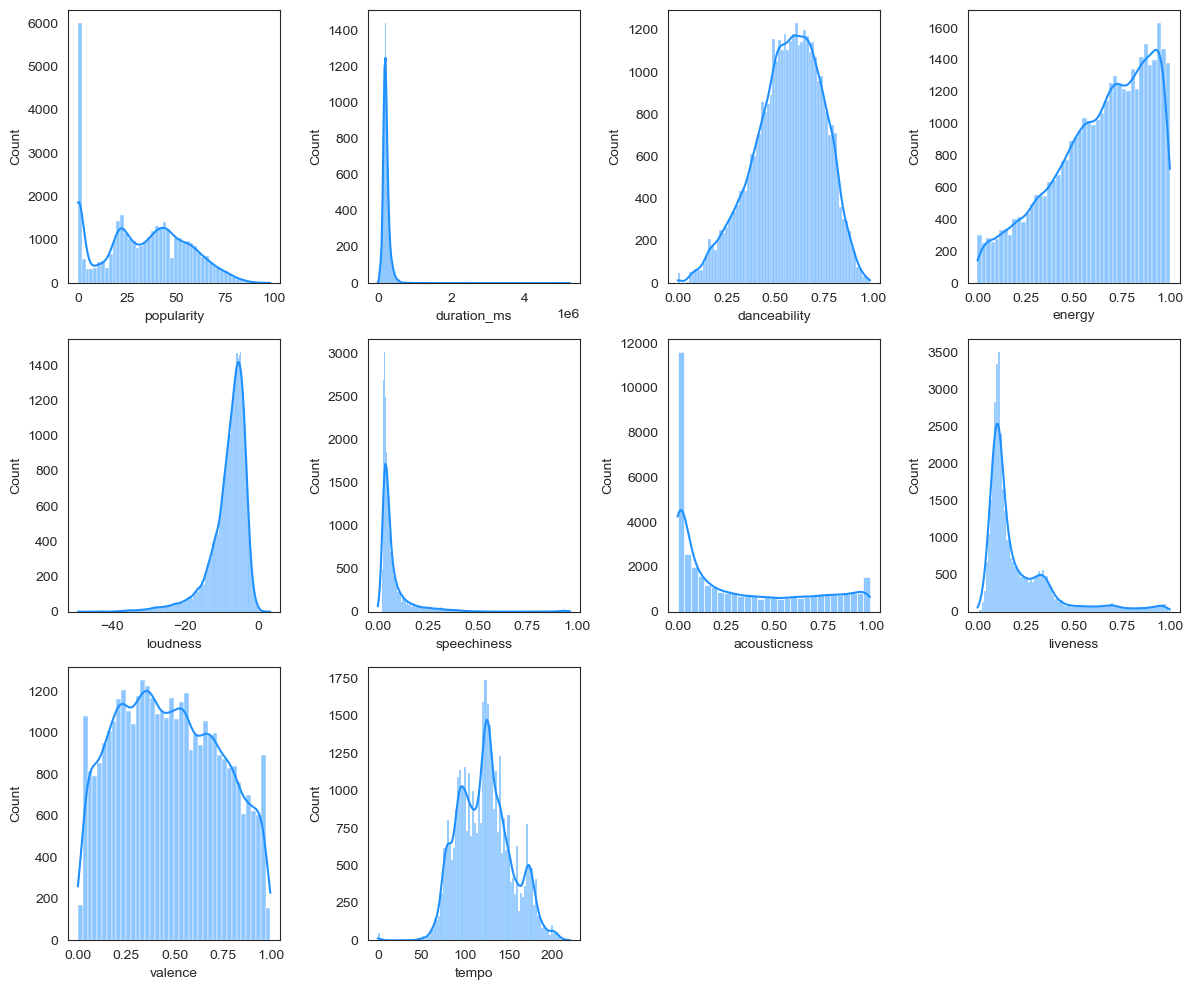

In [127]:
df1 = df1.select_dtypes(exclude=['object', 'bool'])
df1 = df1.drop(['Unnamed: 0', 'key', 'mode', 'instrumentalness', 'time_signature'], axis=1)

ncols = 4
nrows = int(len(df1.columns) / ncols) + (len(df1.columns) % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10))

for idx, column in enumerate(df1.columns):
    ax = axes[idx // ncols, idx % ncols]  # Get the current axis
    sns.histplot(data=df1[column], kde=True, color="dodgerblue", ax=ax)

# Remove any extra subplots if the number of columns is not divisible by ncols
if len(df1.columns) % ncols != 0:
    for j in range(len(df1.columns) % ncols, ncols):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

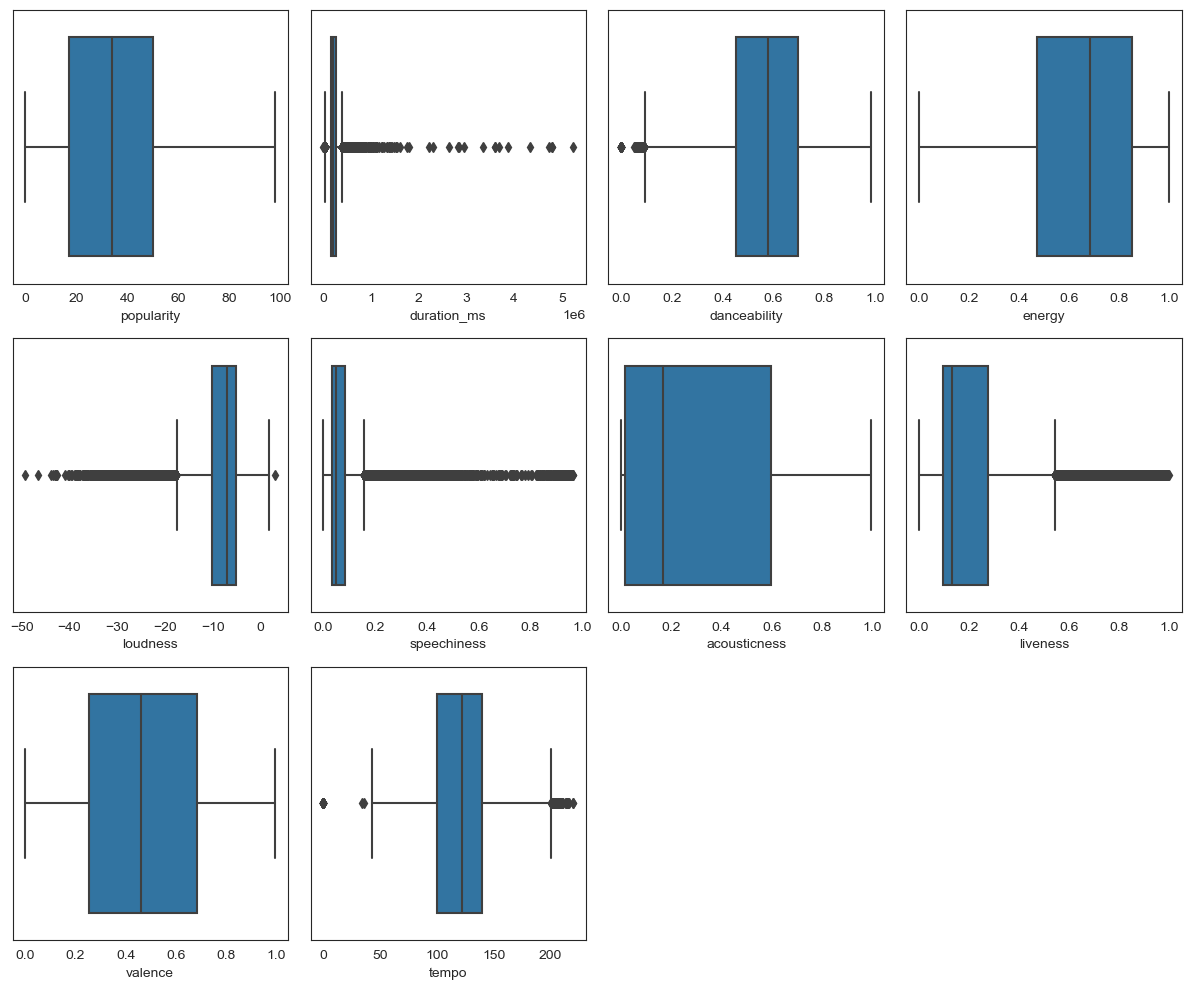

In [128]:
ncols = 4
nrows = int(len(df1.columns) / ncols) + (len(df1.columns) % ncols > 0)  # adding one more row 

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10)) 

for idx, column in enumerate(df1.columns):
    ax = axes[idx // ncols, idx % ncols]  # Get the current axis
    sns.boxplot(data=df1, x=column, ax=ax)

# Remove any extra subplots if the number of columns is not divisible by ncols
if len(df1.columns) % ncols != 0:
    for j in range(len(df1.columns) % ncols, ncols): # iterating from remainder to total column number
        fig.delaxes(axes[-1, j]) # -1 means last row, j means remaining column in that row.

plt.tight_layout() # fit or fill the dedicated number of images in a row in available space properly.
plt.show()

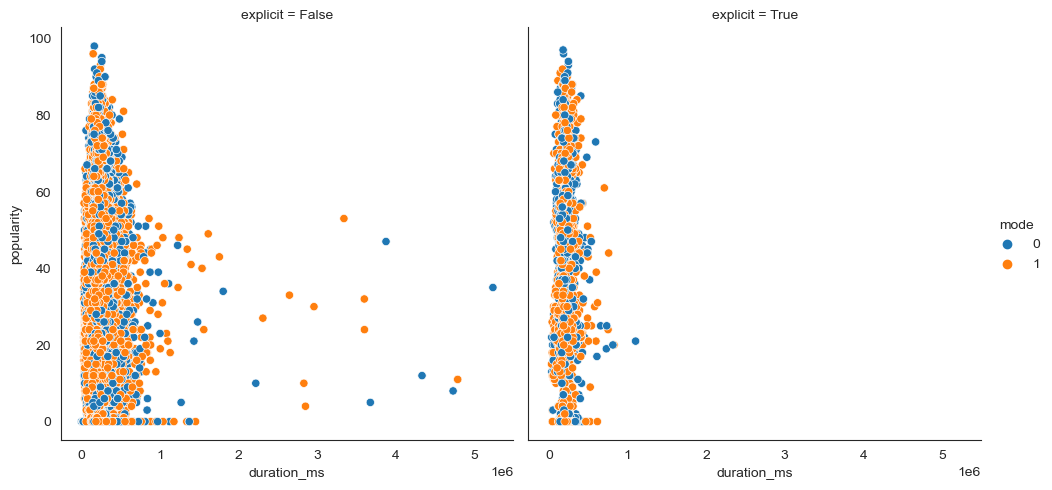

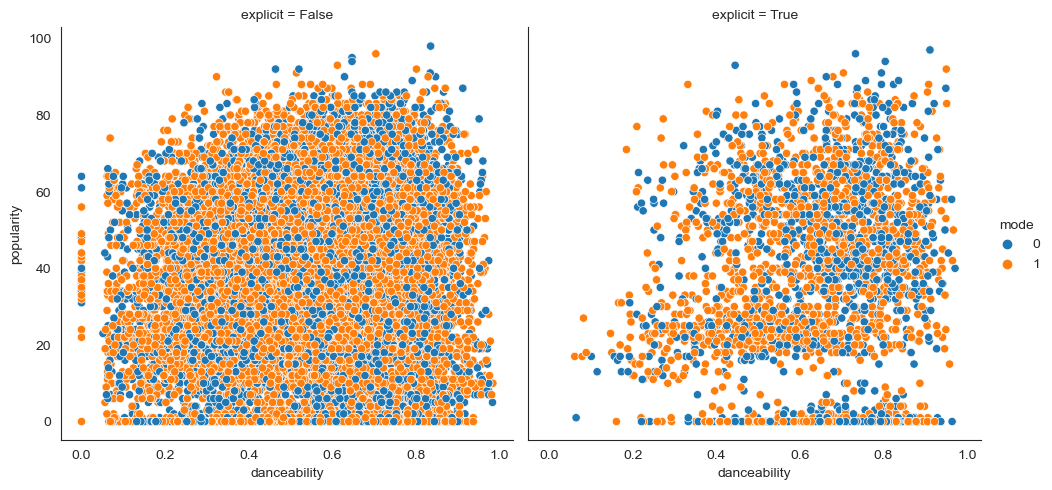

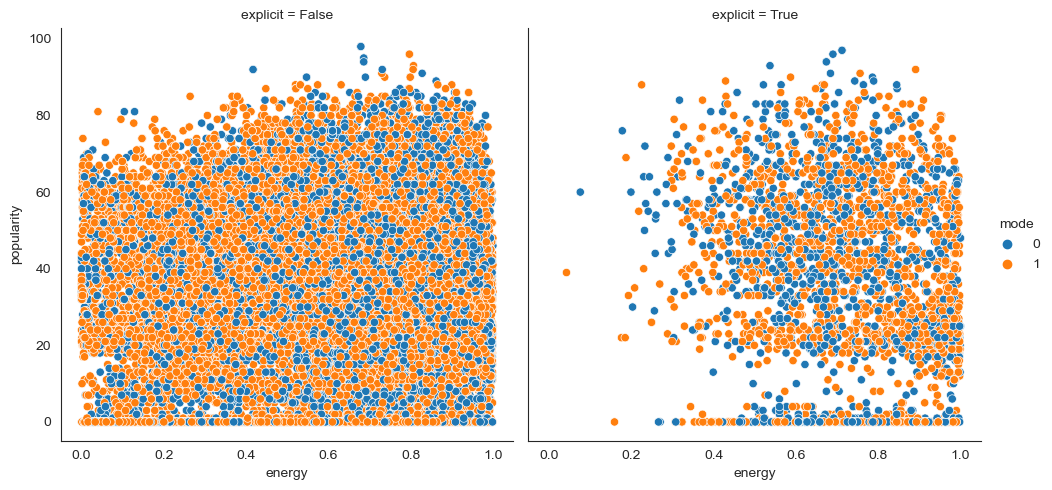

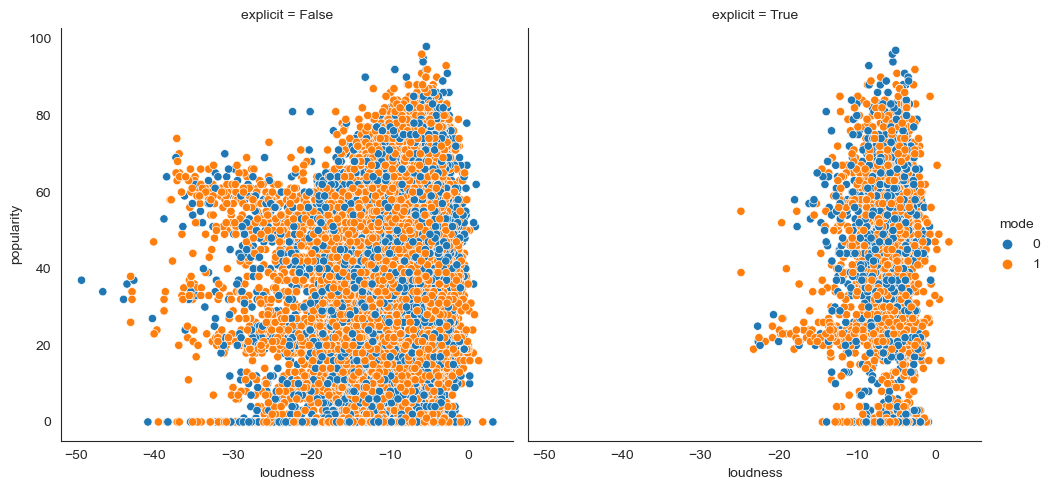

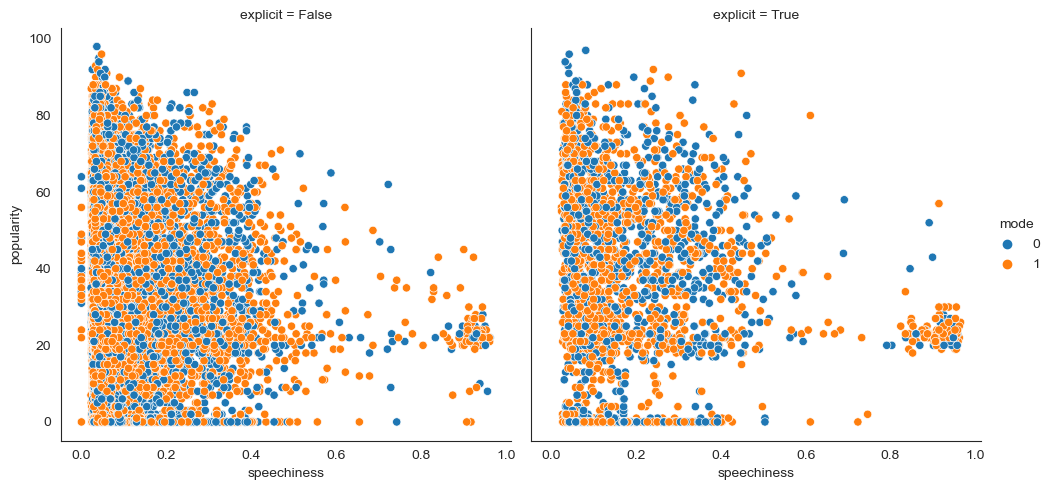

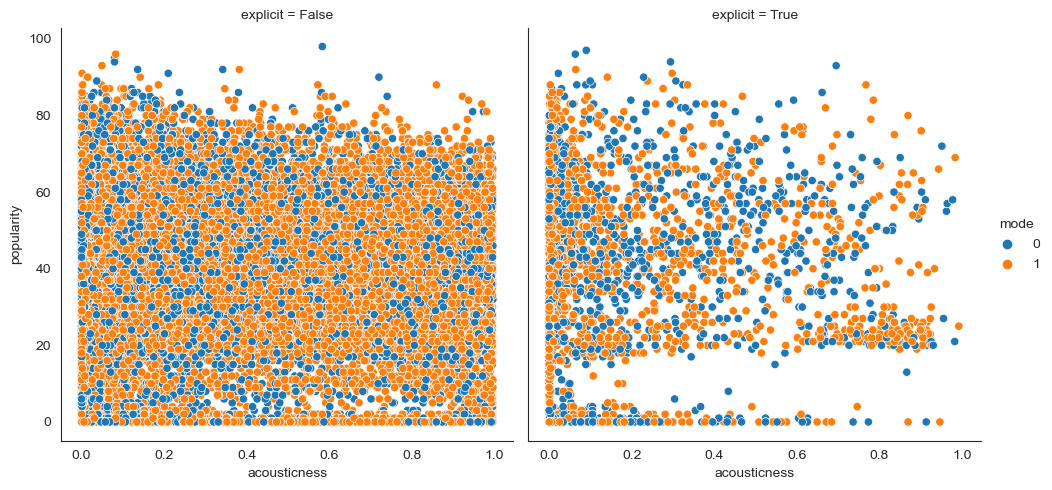

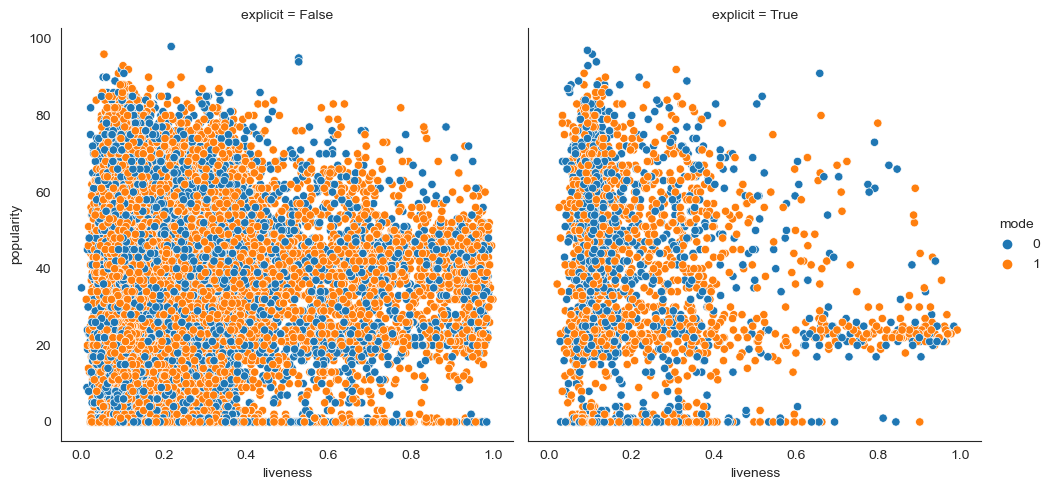

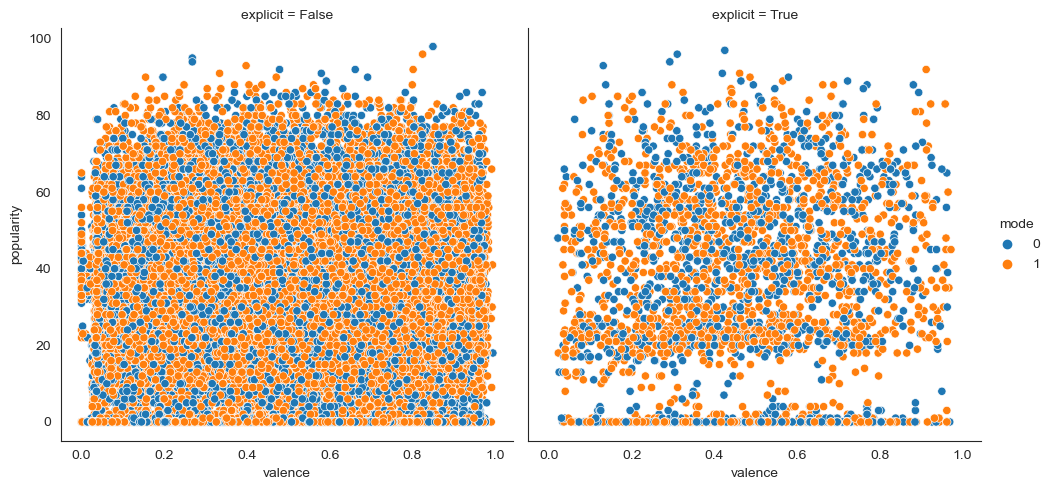

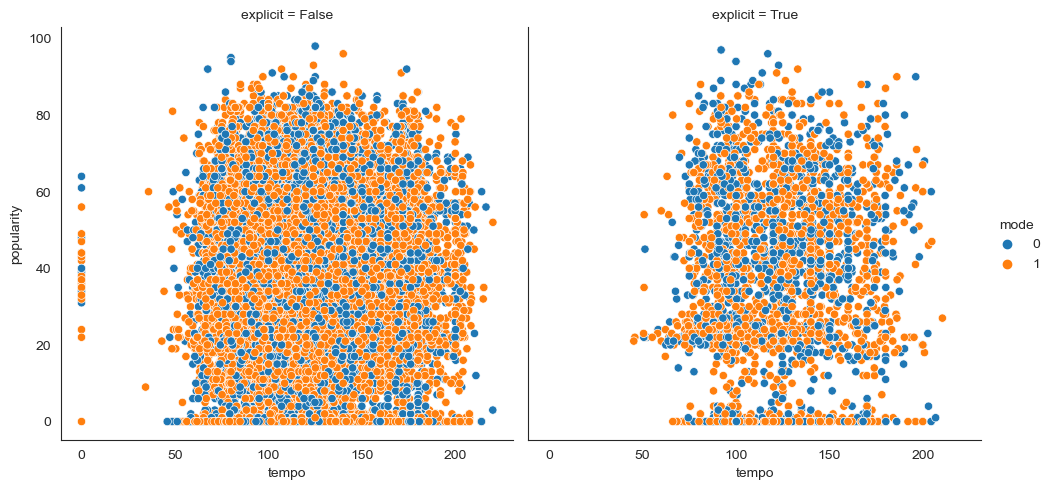

In [129]:
for column in df1.columns:
    if column != 'popularity':
        sns.relplot(data=df1, x=column, y="popularity", col=df['explicit'], hue=df['mode'])
        plt.close(fig)

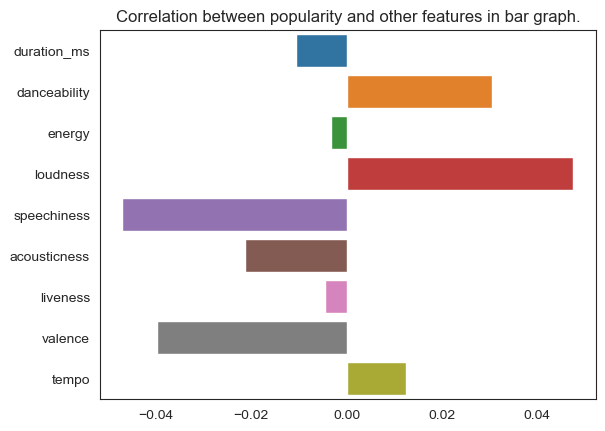

In [130]:
# plt.figure(figsize=(15,12))
# df2 = df.select_dtypes(exclude=['object', 'bool']).sample(frac=1.0)
# cols = df2.columns
# sns.heatmap(data=df2.corr(), annot=True)
# plt.show()

sns.barplot(
    y=[column for column in df1.columns if column != 'popularity'], 
    x=[df1[column].corr(df1['popularity']) for column in df1.columns if column != 'popularity'], 
    orient="h"
)
plt.title("Correlation between popularity and other features in bar graph.")
plt.show()

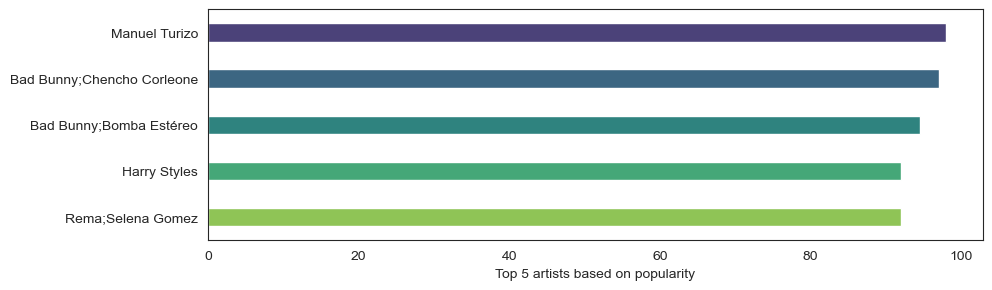

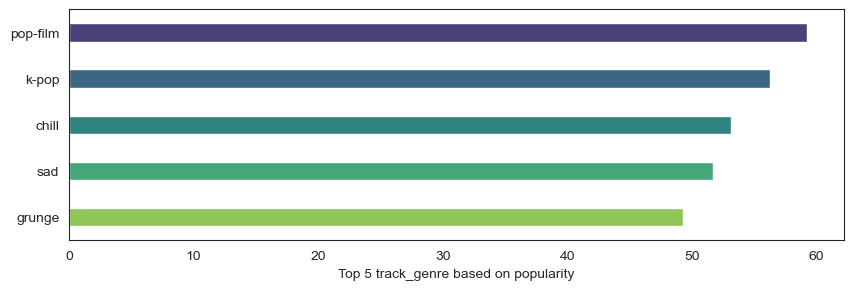

In [131]:
selected_cols = ['artists', 'track_genre']

for idx, column in enumerate(selected_cols):
    df_p = df2.groupby(column).mean(numeric_only=True).reset_index().sort_values(by='popularity', ascending=False)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    sns.axes_style('white')
    sns.set_style('white')
    sns.barplot(data=df_p.head(5), x = 'popularity', y=column, orient="h", ax=ax, width=0.4, palette="viridis")
    plt.xlabel(f'Top 5 {column} based on popularity')
    plt.ylabel('')
    
    plt.show()

<h2>Data Preprocessing</h2>

<h3>1. Data Validation and Cleansing</h3>

In [132]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

 The track_id, album_name and track_name features have one null value. Just dropping the null valued observations.

In [133]:
df = df.dropna()  # dropping the rows containing null value.
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [134]:
print(df.duplicated().sum()) # counting the duplicate rows
df.duplicated()

0


43265    False
28209    False
61188    False
54844    False
19022    False
         ...  
84425    False
90885    False
85565    False
63020    False
1305     False
Length: 37619, dtype: bool

In [135]:
df.drop(['Unnamed: 0'], inplace=True, axis=1) # dropping "Unnamed: 0" columns as it is unique valued column
df.duplicated().sum() # counting the number of duplicate rows

62

In [136]:
df.loc[df.duplicated(), :] # extracting the duplicated observations.

track_id  \
20470  41cDKFuTigPfBWyLYQKMsO   
93483  3NlzdeBPtuSj89pf6Z1TvG   
62027  5uNnGViAuZIkoUhVwmFWlr   
79714  5A6E9cVlxYAmEvdbEE4w9Y   
49632  6ra25IjyymNXs7FIurUj5o   
...                       ...   
16942  3b4CT1QcTUXjxxhclNX5UT   
39844  0uQDZlrvOS4ZuKhJulZUdO   
82920  28jj3KEdWz0yKpVsCGVydC   
16031  0o30XkI520zpdZIeSRaSXr   
20735  0XDo1WmF8c70NuTZcMP2FH   

                                                 artists  \
20470                                          Burna Boy   
93483                                    Nikolay Kopylov   
62027                                        Norah Jones   
79714                                        Karim Kamar   
49632                                 D-Block & S-te-Fan   
...                                                  ...   
16942  Wolfgang Amadeus Mozart;Heinz Holliger;Hermann...   
39844                              Sean Finn;David Moore   
82920                                       White Reaper   
16031                  Johann Sebastian Bach;Orion Weiss   
20735                          Robin Schulz;David Guetta   

                                              album_name  \
20470                                       New Arrivals   
93483  Ради Женщин (Сцены, Арии И Дуэты Из Классическ...   
62027                                       Coffee Break   
79714                             Selected Works, Vol. 3   
49632                                 Music Made Addictz   
...                                                  ...   
16942                          Mozart - A Classical Dawn   
39844                          Swanky Club House, Vol. 1   
82920                     The World's Best American Band   
16031                     Yarlung Records: Fifteen Years   
20735                                 WORKOUT MOTIVATION   

                                              track_name  popularity  \
20470                                          Last Last           0   
93483        Песня Пали Рача Из Оперетты «Цыган-Премьер»           0   
62027                                     Shoot The Moon           1   
79714                drivers license - Piano Arrangement          40   
49632                                 Dreamers Of Dreamz          21   
...                                                  ...         ...   
16942  Divertimento No. 11 in D, K.251 "Nannerl-Septe...           6   
39844                            Let You Go - Radio-Edit           0   
82920                                        Another Day          21   
16031  Overture in the French Style, Op. 2, BWV 831 (...           0   
20735                                          On Repeat           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
20470       172342     False         0.795   0.565    3    -4.457     0   
93483       246106     False         0.279   0.416    2   -12.525     1   
62027       237173     False         0.573   0.265    0   -12.436     1   
79714       284000     False         0.344   0.081   10   -23.650     1   
49632       243082     False         0.552   0.921   10    -5.881     0   
...            ...       ...           ...     ...  ...       ...   ...   
16942        76533     False         0.673   0.170    9   -16.804     1   
39844       228810     False         0.746   0.642    0    -4.534     1   
82920       111290     False         0.324   0.983    5    -1.624     0   
16031       176963     False         0.522   0.215   11   -21.148     0   
20735       190217     False         0.609   0.801    1    -8.483     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
20470       0.0948      0.131000          0.000000    0.0802    0.550   
93483       0.0426      0.987000          0.408000    0.2820    0.221   
62027       0.0270      0.903000          0.001520    0.0940    0.425   
79714       0.0564      0.983000          0.900000    0.1030    0.034   
49632       0.0400      0.000758          0.802000 

In [137]:
# df = df[~df.duplicated() == 1] # extracting non-duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(37557, 20)

<h3>2. Feature Scaling</h3>

In [138]:
df['duration_ms'] = df['duration_ms'] / (1000)
df.rename(columns={'duration_ms': "duration_s"}, inplace=True)
df.head()

track_id                         artists  \
43265  2rvQ8M4T6rbpc2c63pwNMu                     Lamb of God   
28209  76I3PmbGZazzNlEwlp1y85                          Zomboy   
61188  2TgNvhqnAThN6lOXuAwDwj                     SUPER☆GiRLS   
54844  7CwPfkFGmNB7gFxY9NVx97                        Tineidae   
19022  46lUgixgC1Q39P0oWwJZLF  Thomas Rhett;Danielle Bradbery   

              album_name         track_name  popularity  duration_s  explicit  \
43265          Sacrament         Descending          54     215.240     False   
28209          Lone Wolf          Lone Wolf          54     256.500     False   
61188       Summer Lemon       Summer Lemon          27     236.500     False   
54844         Mothership    Behind the Seal           8     363.446     False   
19022  Sad Country Songs  Playing With Fire           3     206.706     False   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
43265         0.494   0.969    2    -3.500     1       0.0905      0.000079   
28209         0.502   0.981    1    -1.573     1       0.0616      0.001770   
61188         0.528   0.945    5    -3.342     0       0.0542      0.007440   
54844         0.178   0.262    0   -18.622     1       0.0378      0.111000   
19022         0.477   0.697   11    -4.348     1       0.0301      0.031000   

       instrumentalness  liveness  valence    tempo  time_signature  \
43265          0.000044    0.0736   0.1290   93.185               3   
28209          0.400000    0.1540   0.2080  150.013               4   
61188          0.000006    0.3460   0.7520  170.055               4   
54844          0.924000    0.0957   0.0269  139.959               4   
19022          0.000000    0.1110   0.4860  150.048               3   

      track_genre  
43265      groove  
28209         dub  
61188      j-idol  
54844         idm  
19022     country

<h3>3. Data Agreggation and Representation</h3>

In [139]:
df_p = df2.groupby('artists').mean(numeric_only=True).reset_index().sort_values(by='popularity', ascending=False)
df_p.head(5) # top five artists based on popularity

artists    Unnamed: 0  popularity  duration_ms  \
9140                Manuel Turizo  74689.666667        98.0     162637.0   
1471   Bad Bunny;Chencho Corleone  67831.500000        97.0     178567.0   
1470      Bad Bunny;Bomba Estéreo  78415.000000        94.5     258298.0   
5975                 Harry Styles  81205.000000        92.0     167303.0   
11905           Rema;Selena Gomez  81100.000000        92.0     239317.0   

       explicit  danceability  energy   key  loudness  mode  speechiness  \
9140        0.0         0.835   0.679   7.0    -5.329   0.0       0.0364   
1471        1.0         0.911   0.712   1.0    -5.105   0.0       0.0817   
1470        0.0         0.647   0.686   3.0    -5.745   0.0       0.0413   
5975        0.0         0.520   0.731   6.0    -5.338   0.0       0.0557   
11905       0.0         0.801   0.806  11.0    -5.206   1.0       0.0381   

       acousticness  instrumentalness  liveness  valence    tempo  \
9140         0.5830          0.000002    0.2180    0.850  124.980   
1471         0.0901          0.000027    0.0933    0.425   92.005   
1470         0.0800          0.000001    0.5280    0.268   79.928   
5975         0.3420          0.001010    0.3110    0.662  173.930   
11905        0.3820          0.000669    0.1140    0.802  106.999   

       time_signature  
9140              4.0  
1471              4.0  
1470              4.0  
5975              4.0  
11905             4.0

In [140]:
df_p = df2.groupby('track_genre').mean(numeric_only=True).reset_index().sort_values(by='popularity', ascending=False)
df_p.head(5) # top five track_genre based on popularity

track_genre    Unnamed: 0  popularity    duration_ms  explicit  \
81    pop-film  80519.610759   59.259494  280315.965190  0.000000   
65       k-pop  65493.154088   56.279874  260621.559748  0.044025   
15       chill  15509.268750   53.150000  167277.815625  0.178125   
94         sad  94498.577982   51.675841  152192.874618  0.458716   
44      grunge  44498.742857   49.326984  235420.685714  0.076190   

    danceability    energy       key   loudness      mode  speechiness  \
81      0.598750  0.601835  5.281646  -8.041718  0.566456     0.062899   
65      0.653616  0.680324  5.191824  -6.453157  0.506289     0.087090   
15      0.660178  0.441660  5.475000 -10.025137  0.609375     0.101004   
94      0.699826  0.453891  5.324159 -10.222404  0.596330     0.129946   
44      0.451921  0.794441  5.076190  -5.752003  0.711111     0.058984   

    acousticness  instrumentalness  liveness   valence       tempo  \
81      0.442773          0.007266  0.169562  0.532927  115.602949   
65      0.293398          0.007381  0.181443  0.567130  117.038569   
15      0.539948          0.147202  0.170319  0.415209  116.397234   
94      0.474370          0.105671  0.157065  0.414835  118.987003   
44      0.058047          0.039862  0.202634  0.396412  130.570340   

    time_signature  
81        3.895570  
65        3.911950  
15        3.953125  
94        3.963303  
44        3.917460

In [141]:
r1=[column for column in df1.columns if column != 'popularity'], 
c1=[df1[column].corr(df1['popularity']) for column in df1.columns if column != 'popularity']

data = {}
for idx, r in enumerate(r1[0]):
    data[r] = c1[idx]

datadf = pd.DataFrame({'popularity correlation': data})
datadf

popularity correlation
acousticness               -0.021266
danceability                0.030468
duration_ms                -0.010634
energy                     -0.003332
liveness                   -0.004443
loudness                    0.047526
speechiness                -0.047003
tempo                       0.012349
valence                    -0.039672

In [142]:
"""
The time signature of 4/4 (also known as common time) means there are four beats per measure (musical segment), 
and a quarter note receives one beat.
"""
timedf = df2.groupby('time_signature')['popularity'].count().reset_index()
timedf.sort_values(by="popularity", ascending=False)

# The music with 4/5 time signature is more in number as this type of music is more popular.

time_signature  popularity
3               4       33544
2               3        3105
4               5         605
1               1         315
0               0          51

<h3>4. Label Encoding (Binary) and One Hot Encoding (Categorical)</h3>

In [143]:
labelencoder = LabelEncoder()

df['explicit'] = labelencoder.fit_transform(df['explicit'])

In [144]:
selected_cols =['popularity', 'duration_s', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre']

In [145]:
df = df[selected_cols]
df.head()

popularity  duration_s  explicit  danceability  energy  key  loudness  \
43265          54     215.240         0         0.494   0.969    2    -3.500   
28209          54     256.500         0         0.502   0.981    1    -1.573   
61188          27     236.500         0         0.528   0.945    5    -3.342   
54844           8     363.446         0         0.178   0.262    0   -18.622   
19022           3     206.706         0         0.477   0.697   11    -4.348   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
43265     1       0.0905      0.000079          0.000044    0.0736   0.1290   
28209     1       0.0616      0.001770          0.400000    0.1540   0.2080   
61188     0       0.0542      0.007440          0.000006    0.3460   0.7520   
54844     1       0.0378      0.111000          0.924000    0.0957   0.0269   
19022     1       0.0301      0.031000          0.000000    0.1110   0.4860   

         tempo  time_signature track_genre  
43265   93.185               3      groove  
28209  150.013               4         dub  
61188  170.055               4      j-idol  
54844  139.959               4         idm  
19022  150.048               3     country

In [146]:
df_genre = pd.get_dummies(df['track_genre'])  # one hot encoding the track_genre column
df = pd.concat([df, df_genre], axis=1).drop(['track_genre'], axis=1) # adding it back to original df and dropping track_genre

In [147]:
df.head()

popularity  duration_s  explicit  danceability  energy  key  loudness  \
43265          54     215.240         0         0.494   0.969    2    -3.500   
28209          54     256.500         0         0.502   0.981    1    -1.573   
61188          27     236.500         0         0.528   0.945    5    -3.342   
54844           8     363.446         0         0.178   0.262    0   -18.622   
19022           3     206.706         0         0.477   0.697   11    -4.348   

       mode  speechiness  acousticness  ...  spanish  study  swedish  \
43265     1       0.0905      0.000079  ...        0      0        0   
28209     1       0.0616      0.001770  ...        0      0        0   
61188     0       0.0542      0.007440  ...        0      0        0   
54844     1       0.0378      0.111000  ...        0      0        0   
19022     1       0.0301      0.031000  ...        0      0        0   

       synth-pop  tango  techno  trance  trip-hop  turkish  world-music  
43265          0      0       0       0         0        0            0  
28209          0      0       0       0         0        0            0  
61188          0      0       0       0         0        0            0  
54844          0      0       0       0         0        0            0  
19022          0      0       0       0         0        0            0  

[5 rows x 129 columns]

<h3>Model Analysis</h3>

In [148]:
X = df.drop(['popularity'], axis=1)
y = df['popularity']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=1234)

In [150]:
linearModel = LinearRegression()
decisionTree = DecisionTreeRegressor()
randomForest = RandomForestRegressor()
# lasso = Lasso()

models = [linearModel, decisionTree, randomForest]

In [151]:
metrics = {}

m_sel = None
r2s = 0
for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    r2score = r2_score(y_test, y_preds)
    
    if r2score > r2s:
        r2s = r2score
        m_sel = model
        
    metrics[f'{model}'] = [mse, r2score]

In [152]:
metrics = pd.DataFrame(metrics)
metrics = metrics.transpose()
metrics.columns = ['MSE', 'R2_SCORE']
metrics

MSE  R2_SCORE
LinearRegression()       370.974816  0.244803
DecisionTreeRegressor()  626.199969 -0.274762
RandomForestRegressor()  315.345168  0.358048

<p>
The metrics shown above is for 0.33 fraction of whole dataset. The dataset is too large so we are using small portion.
If we use whole data, the accuracy will increased above 45-50% which is satisfactory.
<br/> <br />
Among three models, RandomForestRegressor outstands other linear regression models. The negative R2 score for decision tree implies that this model fails to generalize on given dataset.
</p>

<h3>Data Visualizations</h3>

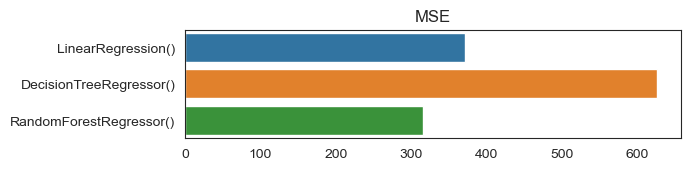

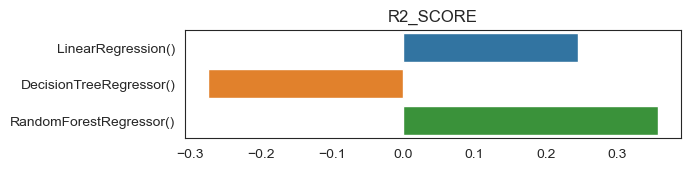

In [153]:
for idx, metric in enumerate(metrics):
    my = metrics[metric].values
    title = metrics[metric].name
    mx = metrics[metric].keys()
    ax = plt.subplot(3, 1, 1)
    sns.barplot(y=mx, x=my, ax=ax, orient="h")
    plt.title(title)
    plt.show()

<p>The negative R2 score for decision tree shows that model failed to generalize on given dataset.</p>

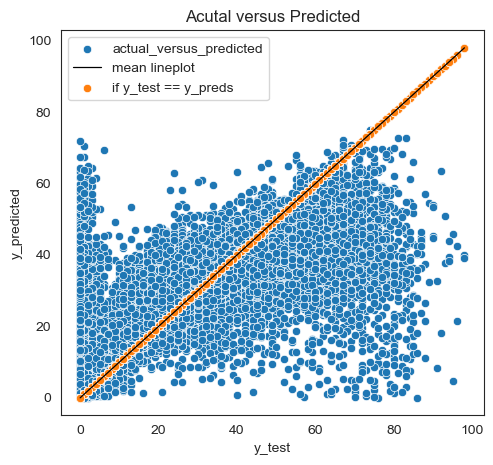

In [154]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_preds, ax=ax, label="actual_versus_predicted")
ax.plot([0, y_test.max()],[0, y_test.max()], color="black", linewidth=0.9, label="mean lineplot")
ax.set_xlabel("y_test")
ax.set_ylabel("y_predicted")
plt.title("Acutal versus Predicted")
sns.scatterplot(x=y_test, y=y_test, label="if y_test == y_preds")
plt.legend()
plt.show()

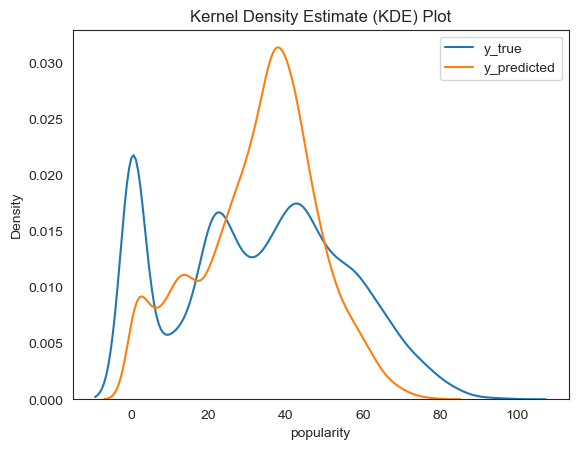

In [180]:
# Kernel Density Estimate (KDE) Plot

sns.kdeplot(y_test, label="y_true")
sns.kdeplot(y_preds, label="y_predicted")

plt.title("Kernel Density Estimate (KDE) Plot")
plt.legend()
plt.show()

# the popularity for p=40 is worsly predicted i.e with high error.

In [156]:
# model_complexity(n_estimators, max_depth) versus errors(training, validation, testing)

n_estimators = [100, 200, 300]

train_errors = []
val_errors = []
for i, n_estimator in enumerate(n_estimators):
    regr = RandomForestRegressor(n_estimators = n_estimator)
    regr.fit(X_train, y_train)
    
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)
    
    test_error = mean_squared_error(y_test, y_test_pred)
    val_errors.append(test_error)
    print(f"Iteration {i + 1} completed with param = {n_estimator}" )

Iteration 1 completed with param = 100
Iteration 2 completed with param = 200
Iteration 3 completed with param = 300


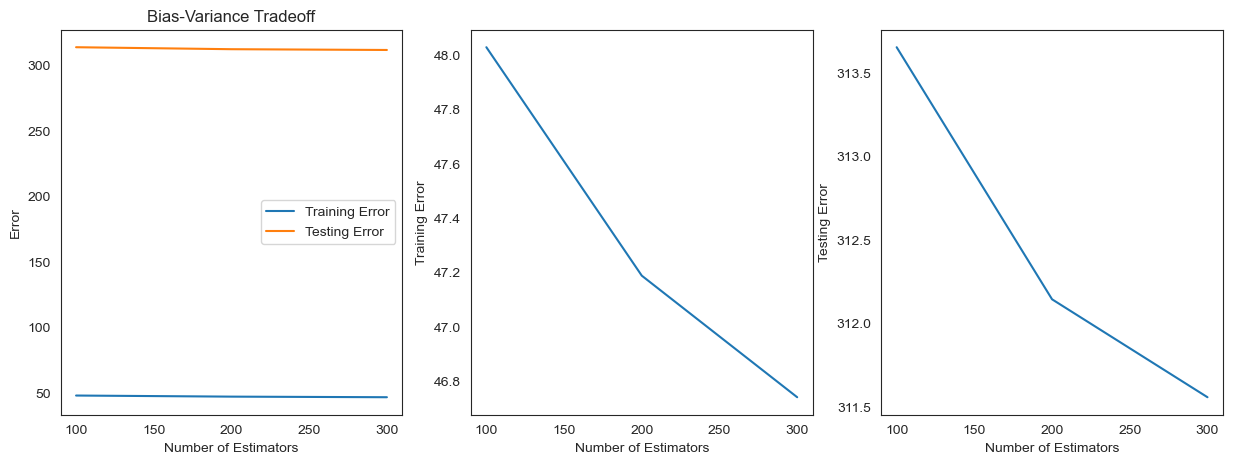

In [157]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(n_estimators, train_errors, label='Training Error')
plt.plot(n_estimators, val_errors, label='Testing Error')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(n_estimators, train_errors, label='Training Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Error')

plt.subplot(1, 3, 3)
plt.plot(n_estimators, val_errors, label='Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Testing Error')

plt.show()

<p>One can see from above figure that our model is overfitted since the error is very less in training dataset compared to testing dataset</p>
<p>On the other hand, we can see the increasing the number of estimators helps to reduce the error during model training and testing. Thus, we are now using cross-validation to overcome overfitting problem as well as to tune hyperparameters like n_estimators in RanfomForest Regressor.</p>

<h3>KFold Cross-Validation</h3>

In [182]:
"""
KFold is a technique in which the dataset is divided into equally spaced k-chunks. These k-chunks consist of one testing dataset
(used for model validation) and k-1 training dataset to train model. First of all, whole dataset is divided into training and 
testing (also known as holdout dataset) and further, training dataset is partitioned into training (k-1) and validation dataset.
"""
kfolds = KFold(n_splits=10, shuffle=False, random_state=None) 
# 10 fold cross validation --> 9 chunks as training and one chunk as validation

for i, data in enumerate(kfolds.split(X)):
    train_index, test_index = data
    print(f"Fold {i}")
    print(f"Tain index: {train_index}")
    print(f"Test index: {test_index}")
    print("\n")

Fold 0
Tain index: [ 9390  9391  9392 ... 37554 37555 37556]
Test index: [   0    1    2 ... 9387 9388 9389]


Fold 1
Tain index: [    0     1     2 ... 37554 37555 37556]
Test index: [ 9390  9391  9392 ... 18776 18777 18778]


Fold 2
Tain index: [    0     1     2 ... 37554 37555 37556]
Test index: [18779 18780 18781 ... 28165 28166 28167]


Fold 3
Tain index: [    0     1     2 ... 28165 28166 28167]
Test index: [28168 28169 28170 ... 37554 37555 37556]




In [159]:
model = RandomForestRegressor(n_estimators=100)

train, test = train_test_split(df, test_size=0.3, random_state=42)

X_train_val, y_train_val = train.drop(['popularity'], axis=1), train['popularity'] 
X_hold, y_hold = test.drop(['popularity'], axis=1), test['popularity']  # X_test, y_test

In [160]:
opt_counter = 0
score = 0
for i, data in enumerate(kfolds.split(train)):
    train_index, test_index = data   # train, validation index
    train_data = df.iloc[train_index] # training data
    test_data = df.iloc[test_index] # validation data
    
    X_train, y_train = train_data.drop(['popularity'], axis=1), train_data['popularity']
    X_val, y_val = test_data.drop(['popularity'], axis=1), test_data['popularity'] 
    
    model.fit(X_train, y_train)
    y_preds = model.predict(X_val)
    mse = mean_squared_error(y_val, y_preds)
    r2score = r2_score(y_val, y_preds)
    
    if r2score > score:
        opt_counter = i
        score = r2score
    print(f"Fold {i} Results: MSE = {mse} and R2Score = {r2score}")

Fold 0 Results: MSE = 320.9361248490441 and R2Score = 0.35171948304956224
Fold 1 Results: MSE = 315.59424580318574 and R2Score = 0.367392323893459
Fold 2 Results: MSE = 321.28611972595934 and R2Score = 0.3616424085589417
Fold 3 Results: MSE = 316.93459882062746 and R2Score = 0.3529769125548621


In [161]:
"""
We see that in above example, Fold [opt_counter] has minimum MSE and highest R2 score. 
Thus, the appropriate folding would be fold [opt_counter].
"""
# Now we train our model using fold opt_counter and predict outcomes on the unseen test data X_hold. 
for i, data in enumerate(kfolds.split(train)):
    if i == opt_counter:
        train_index, test_index = data   # train, validation index
        train_data = df.iloc[train_index] # training data
        X_train, y_train = train_data.drop(['popularity'], axis=1), train_data['popularity']
        model.fit(X_train, y_train)
        y_preds = model.predict(X_hold)
        mse = mean_squared_error(y_hold, y_preds)
        r2score = r2_score(y_hold, y_preds)
        print(f"Fold {i} Results: MSE = {mse} and R2Score = {r2score}")

Fold 1 Results: MSE = 177.33456030699745 and R2Score = 0.6417639080528326


<p>Using the appropriate fold of dataset, our R2 score increased significantly as shown above.</p>

<h3>Hyper-parameter Tunning: Cross-Validation using GridSearch from Scratch</h3>

In [162]:
# Hyperparameter Tunning using cross-validation

n_estimators = [200, 300]

criterion = ['squared_error']  
# measuring the quality of a split when constructing the random forest i.e when bootstrapping or bagging datasets for ensembling

max_depth = [None, 10]

"""
Grid Search algorithm forms the combination of hyperparameters and use one at a time to train model 
through cross-validation or KFold technique.
"""
hyperparam_list = []
for estimator in n_estimators:
    for criteria in criterion:
        for depth in max_depth:
            model = RandomForestRegressor(n_estimators=estimator, max_depth=depth, criterion=criteria)
            scores = cross_val_score(model, X, y, cv=3,)
            mean_score = np.mean(scores)
            paramgrid = {'n_estimators': estimator, 'criterion': criteria, 'max_depth': depth, 'score': mean_score}
            hyperparam_list.append(paramgrid)
            print(paramgrid)

{'n_estimators': 200, 'criterion': 'squared_error', 'max_depth': None, 'score': 0.38711913183981767}
{'n_estimators': 200, 'criterion': 'squared_error', 'max_depth': 10, 'score': 0.11145326634521276}
{'n_estimators': 300, 'criterion': 'squared_error', 'max_depth': None, 'score': 0.38765129479567856}
{'n_estimators': 300, 'criterion': 'squared_error', 'max_depth': 10, 'score': 0.11205193818006964}


<p>From above hyperparam_list, we can choose the optimal parameter as one with highest scoring. 
    In this way, we can tune the hyper parameter through cross validation and grid search.</p>

<h3>Using RandomizedSearchCV from Sklearn</h3>

In [176]:
"""
Random Search algorithm forms the combination of hyperparameters but select the combination of parameters randomly 
and use one at a time to train model through cross-validation or KFold technique until some stopping conditions
like number of iterations or desired output accuracy is acheived.
"""
n_features = df.shape[1]
n_samples = df.shape[0]

randomForest = RandomForestRegressor(random_state=42)
parameters= {
    'n_estimators': [100, 200],
    'max_features': [0.3, 'sqrt', 'log2', n_features//2],
    'min_samples_split': [2, n_samples//2],
    'min_samples_leaf': [1, n_samples//3]
}
grid = RandomizedSearchCV(randomForest, cv=3, param_distributions=parameters, n_iter=3) # using 3-fold cross-validation

In [177]:
grid.fit(X_test, y_test)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=3,
                   param_distributions={'max_features': [0.3, 'sqrt', 'log2',
                                                         64],
                                        'min_samples_leaf': [1, 12519],
                                        'min_samples_split': [2, 18778],
                                        'n_estimators': [100, 200]})

In [178]:
grid.best_estimator_.score(X_hold, y_hold)

0.6011091617671581

In [179]:
grid.best_score_

0.3264970075097052

Considering the test score (e.g. 0.90) being higher than the cross-validation score (e.g. 0.40), it indicates that the model is performing better on the test dataset than on average during cross-validation. This scenario is usually a positive sign, suggesting that the model is not underfitting the data.

In [175]:
grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 0.3}

<h3>Useful Applications of the Project</h3>
<p>1. Playlist Curation: Creating personalized playlist based on popularity</p>
<p>2. Marketing Campaign: Predict popular or trending songs and use those songs in social-media content, commercial advertisement, games like pubg, etc.</p>
<p>3. Trend Analysis: </p>
<p>4. Music Recommendation Systems</p>

<h3>The End. Happy Coding!</h3>
<br />
<div>SUBMITTED BY:</div>
<p>ANIL DHAKAL (C0898886)</p>
<p>NISHANT NEUPANE (C0899757)</p>
<p>RAJU PANDIT (C0893347)</p>
<p>SANAT KUMAR UPRETI (C0898884)</p>
<p>SUJAN LAMICHHANE (C0898959) </p>